In [1]:
## Preprocessing of freesurfer resutls
## Merging all PD/ET/NC freesurfer outputs into one table. /output/all_freesurfer_out.csv
#  reading subject list
from pathlib import Path
import pandas as pd
import seaborn as sns
out_dir = Path("/output")
sub_list_file = out_dir/'subjects.list'
sub_list = pd.read_csv(sub_list_file, sep='\t', header=0, index_col=0)

#reading freesurfer results

res_file = out_dir/'freesurfer_out_preped.csv'
FS_DIR   = out_dir/'freesurfer_output_20.2.0'
GROUPS   = ['PD','ET','NC']
n_groups = len(GROUPS);
group_data={};
for i_group in range(n_groups):
    print('Reading ' , GROUPS[i_group], ' freesurfer stats data...')
    sub_cortical_file = FS_DIR/GROUPS[i_group]/'aseg_stats.txt';
    wm_file = FS_DIR/GROUPS[i_group]/'wmparc_stats.txt'; 
    lh_area_file      = FS_DIR/GROUPS[i_group]/'lh.a2009s.area.txt';      rh_area_file      = FS_DIR/GROUPS[i_group]/'rh.a2009s.area.txt';
    lh_meancurv_file  = FS_DIR/GROUPS[i_group]/'lh.a2009s.meancurv.txt';  rh_meancurv_file  = FS_DIR/GROUPS[i_group]/'rh.a2009s.meancurv.txt';
    lh_thickness_file = FS_DIR/GROUPS[i_group]/'lh.a2009s.thickness.txt'; rh_thickness_file = FS_DIR/GROUPS[i_group]/'rh.a2009s.thickness.txt';
    lh_volume_file    = FS_DIR/GROUPS[i_group]/'lh.a2009s.volume.txt';    rh_volume_file    = FS_DIR/GROUPS[i_group]/'rh.a2009s.volume.txt';
    ## drop_list
    aseg_drop = ["EstimatedTotalIntraCranialVol"];
    wm_drop = ["MaskVol", "EstimatedTotalIntraCranialVol", "CerebralWhiteMatterVol", "rhCerebralWhiteMatterVol", "lhCerebralWhiteMatterVol"];
    area_drop1 = ["BrainSegVolNotVent"];                   area_drop2 = ["BrainSegVolNotVent", "eTIV"];
    meancurv_drop1  = ["BrainSegVolNotVent", "eTIV"];  meancurv_drop2 = ["BrainSegVolNotVent", "eTIV"];
    thickness_drop1 = ["BrainSegVolNotVent", "eTIV"]; thickness_drop2 = ["BrainSegVolNotVent", "eTIV"];
    volume_drop1    = ["BrainSegVolNotVent", "eTIV"];    volume_drop2 = ["BrainSegVolNotVent", "eTIV"];
    ##
    subcortical_tab  = pd.read_csv(sub_cortical_file, sep='\t', header=0, index_col=0); subcortical_tab.drop(aseg_drop, axis=1, inplace=True);
    res    = sub_list.join(subcortical_tab, how='left');
    wm_tab = pd.read_csv(wm_file, sep='\t', header=0, index_col=0); wm_tab.drop(wm_drop, axis=1, inplace=True);
    res1   = res.join(wm_tab, how='left');
    lh_area_tab = pd.read_csv(lh_area_file, sep='\t', header=0, index_col=0); lh_area_tab.drop(area_drop1, axis=1, inplace=True);
    rh_area_tab = pd.read_csv(rh_area_file, sep='\t', header=0, index_col=0); rh_area_tab.drop(area_drop2, axis=1, inplace=True);
    res2 = res1.join(lh_area_tab, how='left'); res3 = res2.join(rh_area_tab, how='left');
    lh_meancurv_tab = pd.read_csv(lh_meancurv_file, sep='\t', header=0, index_col=0); lh_meancurv_tab.drop(meancurv_drop1, axis=1, inplace=True);
    rh_meancurv_tab = pd.read_csv(rh_meancurv_file, sep='\t', header=0, index_col=0); rh_meancurv_tab.drop(meancurv_drop2, axis=1, inplace=True);
    res4 = res3.join(lh_meancurv_tab, how='left'); res5 = res4.join(rh_meancurv_tab, how='left');
    lh_thickness_tab = pd.read_csv(lh_thickness_file, sep='\t', header=0, index_col=0); lh_thickness_tab.drop(thickness_drop1, axis=1, inplace=True);
    rh_thickness_tab = pd.read_csv(rh_thickness_file, sep='\t', header=0, index_col=0); rh_thickness_tab.drop(thickness_drop2, axis=1, inplace=True);
    res6 = res5.join(lh_thickness_tab, how='left'); res7 = res6.join(rh_thickness_tab, how='left');
    lh_volume_tab = pd.read_csv(lh_volume_file, sep='\t', header=0, index_col=0); lh_volume_tab.drop(volume_drop1, axis=1, inplace=True);
    rh_volume_tab = pd.read_csv(rh_volume_file, sep='\t', header=0, index_col=0); rh_volume_tab.drop(volume_drop2, axis=1, inplace=True);
    res8 = res7.join(lh_volume_tab, how='left'); res9 = res8.join(rh_volume_tab, how='left');
    group_data[GROUPS[i_group]]=res9[res9['diagnosis']==GROUPS[i_group]]
all_data = pd.concat([group_data['PD'], group_data['ET'], group_data['NC']])
for x in GROUPS:
    print(x , len(all_data[all_data["diagnosis"]==x]))


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Reading  PD  freesurfer stats data...
Reading  ET  freesurfer stats data...
Reading  NC  freesurfer stats data...
PD 42
ET 38
NC 34


In [2]:
# adding SUIT space ROI data
suit_label_file  = out_dir/'atlasPackage'/'atlasesSUIT'/'Lobules-SUIT.nii.lut'
suit_res_file = out_dir/'res_SUIT'/'res'/'res_SUIT34.csv'
suit_res_df = pd.read_csv(suit_res_file, sep=',', header=None, index_col=None)
suit_label_df = pd.read_csv(suit_label_file, sep=' ', header=None, index_col=None); 
suit_res_df.columns=suit_label_df.iloc[:,7];suit_res_df.index=all_data.index;
all_data = all_data.join(suit_res_df, how='left');  

#Adding MDTB space data
MDTB_res_file = out_dir/'res_SUIT'/'res'/'res_MDTB10.csv'
MDTB_res_df = pd.read_csv(MDTB_res_file, sep=',', header=None, index_col=None)
MDTB_res_df.columns=['MDTB_'+str(x+1) for x in range(10)]; MDTB_res_df.index=all_data.index;
all_data = all_data.join(MDTB_res_df, how='left')

In [3]:
all_data.index   = [x.replace('-','_') for x in all_data.index]
all_data.columns = [x.replace('-','_') for x in all_data.columns]
# remove problematic subjects
all_data=all_data.drop(index='sub_0073'); # only left brain NC
all_data=all_data.drop(index='sub_0064'); # super large head normal control, NC
all_data.columns

Index(['age', 'sex', 'diagnosis', 'Left_Lateral_Ventricle',
       'Left_Inf_Lat_Vent', 'Left_Cerebellum_White_Matter',
       'Left_Cerebellum_Cortex', 'Left_Thalamus_Proper', 'Left_Caudate',
       'Left_Putamen',
       ...
       'MDTB_1', 'MDTB_2', 'MDTB_3', 'MDTB_4', 'MDTB_5', 'MDTB_6', 'MDTB_7',
       'MDTB_8', 'MDTB_9', 'MDTB_10'],
      dtype='object', length=779)

In [4]:
# QA checking processing problems
import numpy as np
[print(x,suit_res_df.loc[x,'Left_I_IV']) 
 for x in suit_res_df.index if suit_res_df.loc[x,'Left_I_IV']<3000]
print('MTTDB')
[print(x,MDTB_res_df.loc[x,'MDTB_1']) 
 for x in MDTB_res_df.index if MDTB_res_df.loc[x,'MDTB_1']<3000]
# QA checking: nan errors (eTIV)
all_data[all_data.isna().any(axis=1)]

sub-0004 2782
sub-0009 2822
sub-0022 2827
sub-0026 2893
sub-0035 2845
sub-0109 2748
sub-0145 2885
sub-1160 2970
sub-4200 2856
sub-0060 2828
sub-0073 0
sub-0113 2920
MTTDB
sub-0073 745


,age,sex,diagnosis,Left_Lateral_Ventricle,Left_Inf_Lat_Vent,Left_Cerebellum_White_Matter,Left_Cerebellum_Cortex,Left_Thalamus_Proper,Left_Caudate,Left_Putamen,...,MDTB_1,MDTB_2,MDTB_3,MDTB_4,MDTB_5,MDTB_6,MDTB_7,MDTB_8,MDTB_9,MDTB_10


In [5]:
# generate the indicator variables for diagnosis and sex
import pandas as pd
import seaborn as sns
#reading freesurfer results
def eqStr(x, str_y):
    if x == str_y:
        return 1
    else:
        return 0
tab_data = all_data.copy();
tab_data["is_PD"]     = [eqStr(x, "PD") for x in tab_data["diagnosis"]];
tab_data["is_ET"]     = [eqStr(x, "ET") for x in tab_data["diagnosis"]];
tab_data["is_NC"]     = [eqStr(x, "NC") for x in tab_data["diagnosis"]];
tab_data["is_Male"]   = [eqStr(x, "M") for x in tab_data["sex"]];
tab_data["is_Female"] = [eqStr(x, "F") for x in tab_data["sex"]];
tab_data=tab_data.rename(index=dict(zip(tab_data.index, [x.replace('-','_') for x in tab_data.index])),
                         columns=dict(zip(tab_data.columns, [x.replace('-','_') for x in tab_data.columns])),)
print(tab_data.columns)

Index(['age', 'sex', 'diagnosis', 'Left_Lateral_Ventricle',
       'Left_Inf_Lat_Vent', 'Left_Cerebellum_White_Matter',
       'Left_Cerebellum_Cortex', 'Left_Thalamus_Proper', 'Left_Caudate',
       'Left_Putamen',
       ...
       'MDTB_6', 'MDTB_7', 'MDTB_8', 'MDTB_9', 'MDTB_10', 'is_PD', 'is_ET',
       'is_NC', 'is_Male', 'is_Female'],
      dtype='object', length=784)


PD 42
ET 38
NC 32


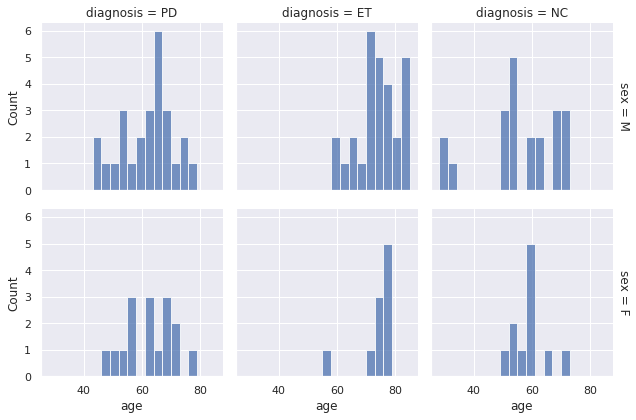

In [6]:
# plot sex and diagnosis distribution 2*3
for x in GROUPS:
    print(x , len(tab_data[tab_data["diagnosis"]==x]))
sns.set_theme(style="darkgrid")
sns.displot(
    tab_data, x="age", col="diagnosis", row="sex", 
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [7]:
tab_data.to_csv(res_file)

In [8]:
# description of subjects
import numpy as np
import statsmodels.stats.weightstats as ws
import scipy.stats

demo_df=tab_data[["age","diagnosis","sex"]];

# 1. reporrt sex
et_m=demo_df[(demo_df['diagnosis']=='ET')&(demo_df['sex']=='M')].shape[0];
et_f=demo_df[(demo_df['diagnosis']=='ET')&(demo_df['sex']=='F')].shape[0];
nc_m=demo_df[(demo_df['diagnosis']=='NC')&(demo_df['sex']=='M')].shape[0];
nc_f=demo_df[(demo_df['diagnosis']=='NC')&(demo_df['sex']=='F')].shape[0];

print('ET Male/Female: ', et_m, '/', et_f)
print('NC Male/Female: ', nc_m, '/', nc_f)

# 2. report age mean and std
print("Group age mean:"); display(demo_df.groupby(['diagnosis']).mean())
print("Group age standard deviation:");display(demo_df.groupby(['diagnosis']).std())

# 3. chi2 tests for sex
print('chisqure test for ET and NC sex (chisq, pval):')
chisq, chi_pval = scipy.stats.chi2_contingency([[et_m, et_f], [nc_m, nc_f]])[:2]
print('\tResults are: ','chisq =%.4f, pvalue = %.4f'%(chisq, chi_pval))

# 4. t tests for age
print('Independent t test for ET and NC age (tstat, pval, df):')
t_stat,t_pval,t_df=ws.ttest_ind(demo_df[demo_df['diagnosis']=='ET']['age'], demo_df[demo_df['diagnosis']=='NC']['age'],
                                alternative='two-sided', usevar='pooled')
print('\tResults are: ','tstat =%.4f, pvalue = %.4f, df = %i'%(t_stat, t_pval, t_df))

ET Male/Female:  28 / 10
NC Male/Female:  21 / 11
Group age mean:


,age
diagnosis,
ET,73.394737
NC,56.312500
PD,62.000000


Group age standard deviation:


,age
diagnosis,
ET,6.965317
NC,11.093263
PD,8.588137


chisqure test for ET and NC sex (chisq, pval):
	Results are:  chisq =0.2220, pvalue = 0.6375
Independent t test for ET and NC age (tstat, pval, df):
	Results are:  tstat =7.8386, pvalue = 0.0000, df = 68
